# Section 1 - Exercises on qubit systems

***

## Exercise 0

### Install Qiskit

Please start by setting up conda and qiskit as outlined in the steps in the Readme. If you have any questions or problems, please don't hesitate to ask us.

### Standard Imports

Please execute the following cell so that you have all imports that are needed often in this tutorial.

In [1]:
from qiskit.visualization import *
from qiskit.quantum_info import Statevector, Operator, random_unitary
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.qasm3 import dump
from qiskit.providers.basic_provider import BasicProvider
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator, noise

***

## Exercise 1

1. You have seen in the lecture that
* for one qubit the possible states are $|0\rangle$ and $|1\rangle$, i.e. two states
* for two qubits the possible states are $|00\rangle$, $|01\rangle$, $|10\rangle$, and $|11\rangle$ i.e. four states

  Let's say that you have a quantum computer with 4 qubits. How many states does it have?

2. List the states of a 4-qubit quantum computer in the same order as introduced in the presentation.

3. How many states does a 127-qubit quantum computer (like the IBM Eagle quantum computers) have? Hint: it is a very large number.

4. Now assume that 128 bits (two times 64 bits because the state amplitudes are complex numbers) are needed per state. What would be the storage need in TB for the states of a 127-qubit quantum computer? (hint: it is much more storage than humanity has available)

Solution: 
1. $2^4=16$
2. $|0000\rangle$, $|0001\rangle$, $|0010\rangle$, $|0011\rangle$, $|0100\rangle$, $|0101\rangle$, $|0110\rangle$, $|0111\rangle$, $|1000\rangle$, $|1001\rangle$, $|1010\rangle$, $|1011\rangle$, $|1100\rangle$, $|1101\rangle$,$|1110\rangle$,$|1111\rangle$
3. $2^{127}=170141183460469231731687303715884105728\approx 1.7\cdot 10^{38}$
4. $128 \ \mathrm{bit}\cdot 2^{127}\approx 2.7 \cdot 10^{27}\ \mathrm{TB}$

***

## Exercise 2

A Hadamard gate $H$ acts is $\displaystyle H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1\end{pmatrix}$.

1. As the initial state we always use $|0\rangle$. How does the Hadamard gate act on this state to create a superposition?
   
   Hint: Follow the steps shown in the presentation:

   1. write state as a vector;
   2. multiply matrix with vector;
   3. write as a state again)
2. How does the Hadamard gate act on the state $|1\rangle$?
3. Now take two qubits in the state $|00\rangle$ and act with a Hadamard gate on each of them. Which state results?

      Hint: Follow the steps shown in the presentation:
  
   1. create a two-qubit operator from the Hadamards, i.e., $H\otimes H$ (a 4x4 matrix)
   2. write state as a vector
   3. multiply matrix with vector
   4. write as a state again
4. Which norm ($\langle s|s\rangle=(\vec s^T)^*\cdot \vec s$) does your state $|s\rangle=H\otimes H|00\rangle$ have? Which norm were you expecting?


Solution: 
1. $H|0\rangle$
    1. $|0\rangle=\begin{pmatrix}1\\0\end{pmatrix}$, 
    2. $H|0\rangle=\frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1\end{pmatrix}\begin{pmatrix}1\\0\end{pmatrix}=\frac{1}{\sqrt{2}}\begin{pmatrix}1\\0\end{pmatrix}$
    3. $=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$
2. $H|1\rangle$
    1. $|1\rangle=\begin{pmatrix}0\\1\end{pmatrix}$,
    2. $H|1\rangle=\frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1\end{pmatrix}\begin{pmatrix}0\\1\end{pmatrix}=\frac{1}{\sqrt{2}}\begin{pmatrix}1\\-1\end{pmatrix}$
    3. $=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$
3. $H\otimes H|00\rangle$
    1. $H\otimes H=\frac{1}{2}\begin{pmatrix}1\cdot \begin{pmatrix} 1 & 1 \\ 1 & -1\end{pmatrix} & 1\cdot \begin{pmatrix} 1 & 1 \\ 1 & -1\end{pmatrix} \\ 1\cdot \begin{pmatrix} 1 & 1 \\ 1 & -1\end{pmatrix} &-1\cdot \begin{pmatrix} 1 & 1 \\ 1 & -1\end{pmatrix}\end{pmatrix}=\frac{1}{2}\begin{pmatrix}1&1&1&1\\1&-1&1&-1\\1&1&-1&-1\\1&-1&-1&1\end{pmatrix}$
    2. $|00\rangle=\begin{pmatrix}1\\0\\0\\0\end{pmatrix}$
    3. $H\otimes H|00\rangle=\frac{1}{2}\begin{pmatrix}1&1&1&1\\1&-1&1&-1\\1&1&-1&-1\\1&-1&-1&1\end{pmatrix}\begin{pmatrix}1\\0\\0\\0\end{pmatrix}=\frac{1}{2}\begin{pmatrix}1\\1\\1\\1\end{pmatrix}$
    4. $=\frac{1}{2}(|00\rangle+|10\rangle+|01\rangle+|11\rangle)$
4. Norm: $\langle s|s\rangle=(\vec s^T)^*\cdot \vec s=\frac{1}{2} \begin{pmatrix}1&1&1&1\end{pmatrix}\cdot \frac{1}{2}\begin{pmatrix}1\\1\\1\\1\end{pmatrix}$. One expects the norm to be equal to one because the initial state $|00\rangle$ has a norm of one and quantum gates don't change the norm because they are unitary matrices.


***

## Exercise 3

1. Create a quantum circuit consisting of one qubit by 

> qc = QuantumCircuit(1) 

and apply Hadamard gate:

> qc.h(0)

Draw the quantum circuit using 

> qc.draw(output='mpl')

Then compare the resulting state with your result from Exercise 2 1. with

> print(Statevector(qc))

Then plot the Bloch vector of the quantum state at each stage using

> plot_bloch_multivector(Statevector(qc))

2. To create the state $|1\rangle$ we need to apply an X-gate
> qc.x(0)

to flip the initial state $|0\rangle$ to $|1\rangle$ before applying the Hadamard gate. Extend your code from the first part of this exercise to include the flip and compare the resulting state to your result from Exercise 2 2.

3. Now create two qubits and apply Hadamard gates to each of them. Compare the resulting state to your result from Exercise 2 3.

4. Try out the above three examples with the IBM Quantum Composer at https://quantum.ibm.com/composer/.


In [130]:
#write your Python code for task 1 here

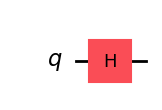

In [131]:
#Solution for task 1
qc = QuantumCircuit(1)
qc.h(0)
qc.draw(output='mpl')

In [132]:
print(Statevector(qc))

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


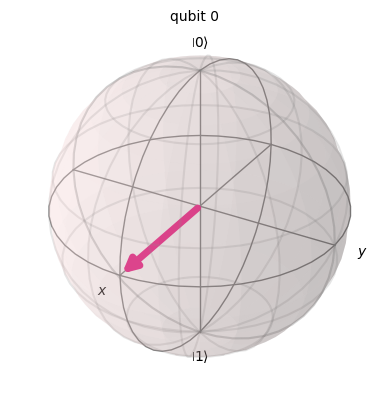

In [133]:
plot_bloch_multivector(Statevector(qc))

In [134]:
#write your Python code for task 2 here

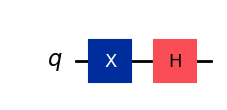

In [135]:
#Solution
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.draw(output='mpl')

In [136]:
print(Statevector(qc))

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


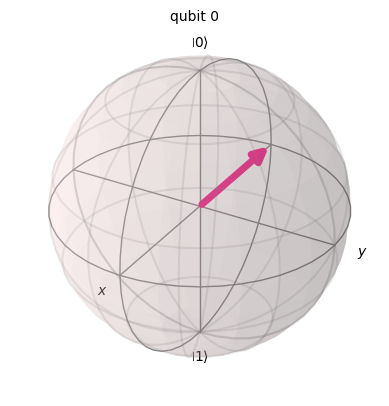

In [137]:
plot_bloch_multivector(Statevector(qc))

In [16]:
#write your Python code for task 3 here

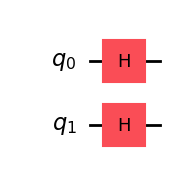

In [141]:
#Solution for task 3
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.draw(output='mpl')

In [142]:
print(Statevector(qc))

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


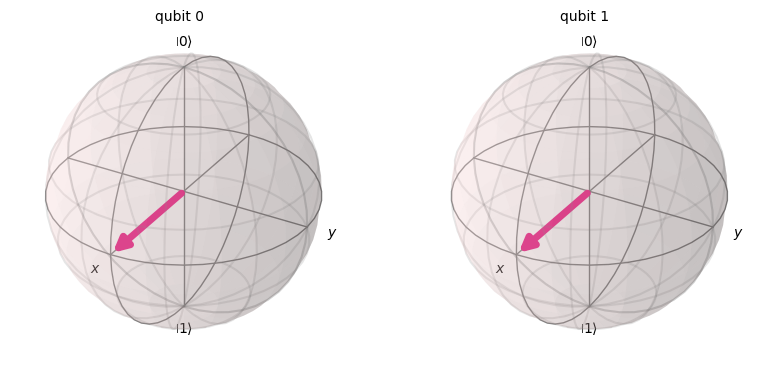

In [143]:
plot_bloch_multivector(Statevector(qc))

## Exercise 4

In the presentation, you have seen that the CNOT gate can be written as a matrix as:

\begin{pmatrix}
1&0&0&0\\
0&0&0&1\\
0&0&1&0\\
0&1&0&0\end{pmatrix}

for the ordering of states $|00\rangle,|01\rangle,|10\rangle,|11\rangle$.

1. Verify that the matrix representation of the CNOT gate in Qiskit is indeed the one listed above. You can get the matrix representation of a circuit in qiskit with
> Operator(qc).data

Hint: the CNOT gate in qiskit is qc.cx(control, target)
 
> qc.c(0,1)

2. Get the circuit plot and matrix representation of a CNOT gate in Qiskit where the first qubit is the target and the second one is the control qubit.

3. Other ways how a CNOT gate with a changed order of control and target qubit can be achieved are

> qc.h(0);qc.h(1);qc.cx(0,1);qc.h(0);qc.h(1)

and 

> qc.swap(0,1);qc.cx(0,1);qc.swap(0,1)

Draw the circuits for these two variants and show by comparing their matrix representations with the matrix representation of 

> qc.cx(0,1)

that they indeed achieved the wanted operation.

4. (challenging) The matrix representation of quantum gates like CNOT depends on the ordering of the states. If states are exchanged, then the corresponding rows and columns of the matrix are exchanged. The CNOT gate for the order $|01\rangle,|00\rangle,|10\rangle,|11\rangle$ would thus look like:
\begin{pmatrix}
0&0&0&1\\
0&1&0&0\\
0&0&1&0\\
1&0&0&0\end{pmatrix}

You can get a matrix representation by remembering that $CNOT$ acts as:

$CNOT|01\rangle=|11\rangle$

$CNOT|00\rangle=|00\rangle$

$CNOT|10\rangle=|10\rangle$

$CNOT|11\rangle=|01\rangle$

and then choose the locations of the ones in the matrix accordingly.

In the literature, you can sometimes see CNOT listed instead as
$CNOT_\mathrm{lit}=\begin{pmatrix}
1&0&0&0\\
0&1&0&0\\
0&0&0&1\\
0&0&1&0\end{pmatrix}$

Which ordering of basis states does this matrix representation correspond to? (Hint: The ordering for $CNOT_\mathrm{lit}$ is intuitive if you think about the possible byte orderings/endianness)

In [ ]:
#Write your Python code for task 1 here

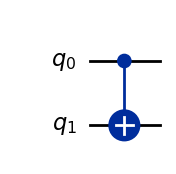

In [254]:
#Solution for 1.
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.draw(output='mpl')

In [255]:
Operator(qc).data

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]])

In [ ]:
#Write your Python code for task 2 here

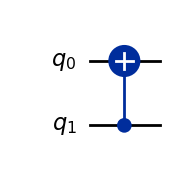

In [39]:
#Solution for 2.
qc = QuantumCircuit(2)
qc.cx(1,0)
qc.draw(output='mpl')

In [40]:
Operator(qc).data

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])

In [ ]:
#Write your Python code for task 3 here

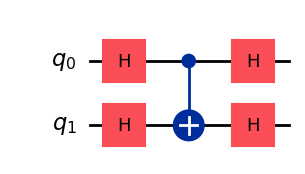

In [42]:
#Solution for 3.
qc = QuantumCircuit(2)
qc.h(0);qc.h(1);qc.cx(0,1);qc.h(0);qc.h(1)
qc.draw(output='mpl')

In [43]:
Operator(qc).data

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])

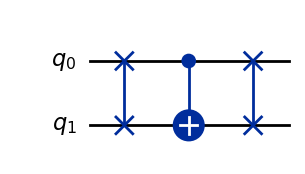

In [44]:
qc = QuantumCircuit(2)
qc.swap(0,1);qc.cx(0,1);qc.swap(0,1)
qc.draw(output='mpl')

In [45]:
Operator(qc).data

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])

Solution for task 4.:
1. $|00\rangle,|10\rangle,|01\rangle,|11\rangle$


***

## Exercise 5

Now, we want to construct some specific states. The quantum logic gates which come now into play are the Pauli-$Z$ gate, the Pauli-$X$ (NOT) gate, and the CNOT gate:

$\displaystyle Z = \begin{pmatrix} 1 & 0 \\ 0 & -1\end{pmatrix}$, $\qquad \displaystyle \text{NOT} = \begin{pmatrix} 0& 1\\ 1 & 0 \end{pmatrix}$, $\qquad \displaystyle \text{CNOT} = \begin{pmatrix}1 & 0 & 0 & 0\\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1& 0\\ 0 & 1 & 0 & 0 \end{pmatrix}$

1. Construct the Bell state $\displaystyle |\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}} $. To do so, create a quantum circuit with two qubits and use one Hadamard gate and one CNOT gate. Draw the circuit and get the resulting statevector.

2. How can we construct the other Bell states?

$\displaystyle|\Phi^-\rangle = \frac{|00\rangle - |11\rangle}{\sqrt{2}} $, $\qquad \displaystyle|\Psi^+\rangle = \frac{|01\rangle + |10\rangle}{\sqrt{2}} $, $\qquad \displaystyle|\Psi^-\rangle = \frac{|01\rangle - |10\rangle}{\sqrt{2}} $

Hint: If you want to play around with circuits and quickly try out combinations, the IBM Quantum Composer at https://quantum.ibm.com/composer/ is a great tool.

3. In quantum computing, oracles play a crucial role in many quantum algorithms. An oracle is a black box subroutine used to perform a specific computation on a quantum state. Find an oracle $U$, i.e., a unitary operation, acting on three qubits corresponding to the following truth table:

|    | Input | Output |
| -- | ----- | ------ |
| 0  | 000   | 000    |
| 1  | 001   | 001    |
| 2  | 010   | 011    |
| 3  | 011   | 010    |
| 4  | 100   | 111    |
| 5  | 101   | 110    |
| 6  | 110   | 100    |
| 7  | 111   | 101    |

Write down the matrix representation of the gate.

With 

> qr=QuantumRegister(3)

> circ = QuantumCircuit(qr)

> circ.unitary(U,qr)

> circ = transpile(circ, basis_gates=['cx','u'])

> circ.draw('mpl')

you can get a gate representation of the unitary matrix $U$ in terms of CNOT gates and arbitrary single-qubit gates. Draw the generated circuit and get the depth of the circuit with

> circ.depth()

4. The following lengthy circuit expresses a gate that you have seen in the presentation. Which one is it?

Hint: Get the matrix representation of the circuit with Qiskit and write down how it acts on the states $|000\rangle, |001\rangle,...$ in a table. Instead of the matrix-vector multiplications, you can also create the states as inputs and see how it acts on them.

```
circuit = QuantumCircuit(3)
circuit.h(2)
circuit.cx(1,2)
circuit.tdg(2)
circuit.cx(0,2)
circuit.t(2)
circuit.cx(1,2)
circuit.tdg(2)
circuit.cx(0,2)
circuit.barrier()
circuit.t(1)
circuit.t(2)
circuit.barrier()
circuit.h(2)
circuit.cx(0,1)
circuit.barrier()
circuit.t(0)
circuit.tdg(1)
circuit.barrier()
circuit.cx(0,1)
```

5. You can get a decomposition of multi-qubit gates into simpler gates with

> circuit.decompose()

Use this functionality to check if the circuit below is indeed the gate you found in the previous task.

In [99]:
#Write yout Python code for task 1 here

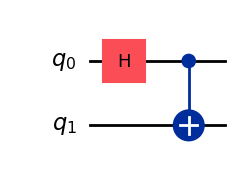

In [56]:
#Solution 1: 1/sqrt(2)(|00>+|11>)
qc = QuantumCircuit(2)
qc.h(0);qc.cx(0,1)
qc.draw(output='mpl')

In [57]:
print(Statevector(qc))

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [102]:
#Write yout Python code for task 2 for 1/sqrt(2)(|00>-|11>) here

In [103]:
#Solution 2: 1/sqrt(2)(|00>-|11>)
qc = QuantumCircuit(2)
qc.h(0);qc.z(0);qc.cx(0,1)
print(Statevector(qc))

Statevector([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,
             -0.70710678+0.j],
            dims=(2, 2))


In [104]:
#Write yout Python code for task 2 for 1/sqrt(2)(|01>+|10>) here

In [344]:
#Solution 2: 1/sqrt(2)(|01>+|10>)
qc = QuantumCircuit(2)
qc.h(0);qc.x(1);qc.cx(0,1)
print(Statevector(qc))

Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


In [106]:
#Write yout Python code for task 2 for 1/sqrt(2)(|01>-|10>) here

In [107]:
#Solution 2: 1/sqrt(2)(|01>-|10>)
qc = QuantumCircuit(2)
qc.h(0);qc.x(1);qc.z(0);qc.z(1);qc.cx(0,1)
print(Statevector(qc))

Statevector([ 0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))


In [240]:
#Write down your code for task 3 here
#get the elements of U from the given truth table
#U=[[?,?,?,?,?,?,?,?],
#[?,?,?,?,?,?,?,?],
#[?,?,?,?,?,?,?,?],
#[?,?,?,?,?,?,?,?],
#[?,?,?,?,?,?,?,?],
#[?,?,?,?,?,?,?,?],
#[?,?,?,?,?,?,?,?],
#[?,?,?,?,?,?,?,?]]
#qr=QuantumRegister(3)
#circ = QuantumCircuit(qr)
#circ.unitary(U,qr)
#circ = transpile(circ, basis_gates=['cx','u'])
#circ.decompose().draw('mpl')

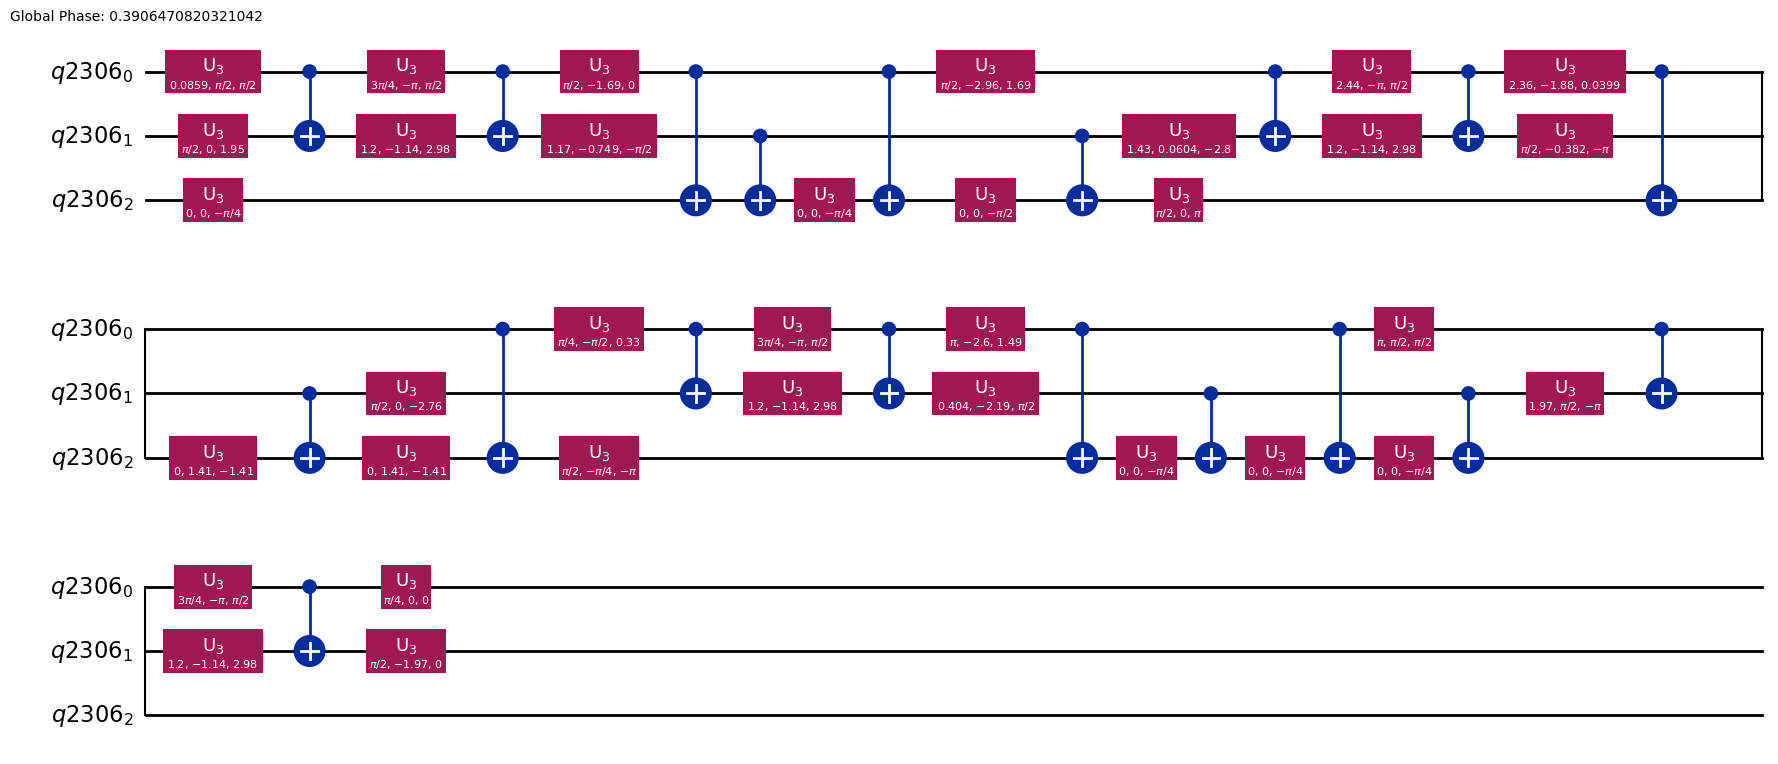

In [342]:
#Solution 3:
#|    | Input | Output |
#| -- | ----- | ------ |
#| 0  | 000   | 000    |
#| 1  | 001   | 001    |
#| 2  | 010   | 011    |
#| 3  | 011   | 010    |
#| 4  | 100   | 111    |
#| 5  | 101   | 110    |
#| 6  | 110   | 100    |
#| 7  | 111   | 101    |
#U|010>=|011> --> U|"spalte">=|"zeile">
U=[[1,0,0,0,0,0,0,0],
   [0,1,0,0,0,0,0,0],
   [0,0,0,1,0,0,0,0],
   [0,0,1,0,0,0,0,0],
   [0,0,0,0,0,0,1,0],
   [0,0,0,0,0,0,0,1],
   [0,0,0,0,0,1,0,0],
   [0,0,0,0,1,0,0,0]]

qr=QuantumRegister(3)
circ = QuantumCircuit(qr)
circ.unitary(U,qr)
circ = transpile(circ, basis_gates=['cx','u3'])
circ.draw('mpl')

In [343]:
circ.depth()

38

In [163]:
#Write your Python code for task 4 here
circuit = QuantumCircuit(3)
circuit.h(2)
circuit.cx(1,2)
circuit.tdg(2)
circuit.cx(0,2)
circuit.t(2)
circuit.cx(1,2)
circuit.tdg(2)
circuit.cx(0,2)
circuit.barrier()
circuit.t(1)
circuit.t(2)
circuit.barrier()
circuit.h(2)
circuit.cx(0,1)
circuit.barrier()
circuit.t(0)
circuit.tdg(1)
circuit.barrier()
circuit.cx(0,1)
#...

In [221]:
#Solution 4:
circuit = QuantumCircuit(3)
circuit.h(2)
circuit.cx(1,2)
circuit.tdg(2)
circuit.cx(0,2)
circuit.t(2)
circuit.cx(1,2)
circuit.tdg(2)
circuit.cx(0,2)
circuit.barrier()
circuit.t(1)
circuit.t(2)
circuit.barrier()
circuit.h(2)
circuit.cx(0,1)
circuit.barrier()
circuit.t(0)
circuit.tdg(1)
circuit.barrier()
circuit.cx(0,1)
Operator(circuit).data

array([[1.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
        0.00000000e+00+0.j, 1.11022302e-16+0.j, 0.00000000e+00+0.j,
        0.00000000e+00+0.j, 0.00000000e+00+0.j],
       [0.00000000e+00+0.j, 1.00000000e+00+0.j, 0.00000000e+00+0.j,
        0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
        0.00000000e+00+0.j, 0.00000000e+00+0.j],
       [0.00000000e+00+0.j, 0.00000000e+00+0.j, 1.00000000e+00+0.j,
        0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
        0.00000000e+00+0.j, 0.00000000e+00+0.j],
       [0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
        0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
        0.00000000e+00+0.j, 1.00000000e+00+0.j],
       [1.11022302e-16+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
        0.00000000e+00+0.j, 1.00000000e+00+0.j, 0.00000000e+00+0.j,
        0.00000000e+00+0.j, 0.00000000e+00+0.j],
       [0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       

In [121]:
#with acting on states: example for |011>
circuit = QuantumCircuit(3)
#prepare initial state
circuit.x(0)
circuit.x(1)

#act with circuit
circuit.h(2)
circuit.cx(1,2)
circuit.tdg(2)
circuit.cx(0,2)
circuit.t(2)
circuit.cx(1,2)
circuit.tdg(2)
circuit.cx(0,2)
circuit.barrier()
circuit.t(1)
circuit.t(2)
circuit.barrier()
circuit.h(2)
circuit.cx(0,1)
circuit.barrier()
circuit.t(0)
circuit.tdg(1)
circuit.barrier()
circuit.cx(0,1)
print(Statevector(circuit)) #=|111>

Statevector([0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
             9.52420783e-18+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
             0.00000000e+00+0.j, 1.00000000e+00+0.j],
            dims=(2, 2, 2))


$|000\rangle \mapsto |000\rangle$

$|001\rangle \mapsto |001\rangle$

$|010\rangle \mapsto |010\rangle$

$|011\rangle \mapsto |111\rangle$

$|100\rangle \mapsto |100\rangle$

$|101\rangle \mapsto |101\rangle$

$|110\rangle \mapsto |110\rangle$

$|111\rangle \mapsto |011\rangle$

The qubit is flipped if the other two qubits are 11. Thus, it is the Toffoli gate:

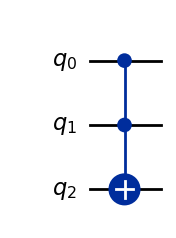

In [123]:
#Solution for task 4
circuit = QuantumCircuit(3)
circuit.ccx(0,1,2)
circuit.draw('mpl')

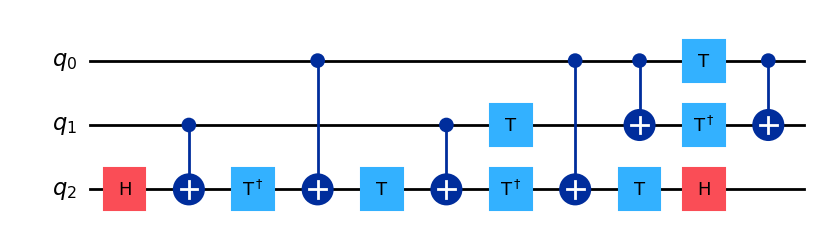

In [119]:
#Solution 5
circuit = QuantumCircuit(3)
circuit.ccx(0,1,2)
circuit.decompose().draw('mpl')